
# Recognizing hand-written digits with SVM

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import numpy as np

### Load the digits data set

#### 8x8 images of digits 

In [2]:
digits = datasets.load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [5]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
# number of images? and its target?
print(len(digits["images"]))
print((digits['target']))

1797
[0 1 2 ... 8 9 8]


### Lets plot some of the images

Text(0.5,1,'Target is 2')

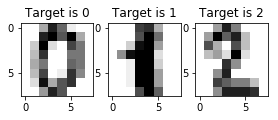

In [11]:
plt.subplot(1, 4, 1)
plt.imshow(digits['images'][0], cmap=plt.cm.gray_r)
plt.title("Target is {0}".format(digits['target'][0]))

plt.subplot(1, 4, 2)
plt.imshow(digits['images'][1], cmap=plt.cm.gray_r)
plt.title("Target is {0}".format(digits['target'][1]))

plt.subplot(1, 4, 3)
plt.imshow(digits['images'][258], cmap=plt.cm.gray_r)
plt.title("Target is {0}".format(digits['target'][258]))

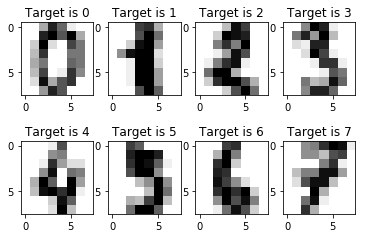

In [13]:
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.imshow(digits['images'][i-1], cmap=plt.cm.gray_r)
    plt.title("Target is {0}".format(digits['target'][i-1]))

In [16]:
# print(digits['images'][0].reshape(-1, 1))
print(digits['images'][0].reshape(1, 64))

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


In [18]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) #

In [33]:
classifier = svm.SVC(kernel='linear')

In [34]:
split_val = 1000

X_train, X_test = data[:split_val], data[split_val:]
Y_train, Y_test = digits.target[:split_val], digits.target[split_val:]

### Lets run the classifier

In [35]:
model = classifier.fit(X_train, Y_train)
obtained_Y = model.predict(X_test)

### Lets check the Metrics

In [36]:
print(metrics.classification_report(Y_test, obtained_Y))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97        79
          1       0.96      0.89      0.92        80
          2       1.00      0.99      0.99        77
          3       0.97      0.84      0.90        79
          4       1.00      0.94      0.97        83
          5       0.89      0.99      0.94        82
          6       0.98      0.99      0.98        80
          7       0.94      0.95      0.94        80
          8       0.87      0.93      0.90        76
          9       0.88      0.93      0.90        81

avg / total       0.94      0.94      0.94       797



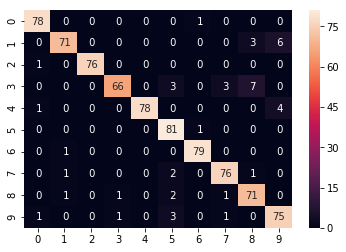

In [39]:
import seaborn as sb
sb.heatmap(metrics.confusion_matrix(Y_test, obtained_Y), fmt='2d', annot=True)

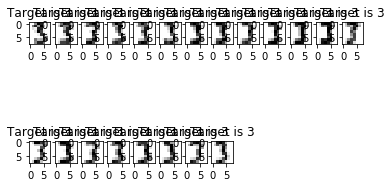

In [32]:
j = 1
for i in range(0, 200):
    if digits['target'][i] == 3:
        plt.subplot(2, 13, j)
        plt.imshow(digits['images'][i], cmap=plt.cm.gray_r)
        plt.title("Target is {0}".format(digits['target'][i]))
        j = j+1